# Visualisera / Rensa data

Här kommer lite exempel på hur vi kan jobba med och utforska data i Jupyter notebook

## 1. Ladda data

Först laddar vi och visar `customer_data.csv`

In [1]:
import pandas as pd

df_customers = pd.read_csv("customer_data.csv")

df_customers.head()

,customer_id,name,email,age,purchase_frequency,phone
0,1,Sundar Torvalds,invalid_email,5.0,low,0722-250865
1,2,Jeff Pichai,invalid_email,51.0,high,0776-947453
2,3,Larry Page,larry.page@example.com,32.0,low,0721-396539
3,4,Larry Gates,larry.gates@example.com,53.0,high,0796-822934
4,5,Elon Pichai,elon.pichai@example.com,96.0,high,0713-495189


Sedan laddar vi in `product_data.csv` på samma sätt

In [2]:
df_products = pd.read_csv("product_data.csv")

df_products.head()

,product_id,product_name,price,size,color
0,1,Incredible Magnificent Tie,629.0,S,Yellow
1,2,Amazing Slim Shoes,589.0,M,Blue
2,3,Large Blue Coat,609.0,L,White
3,4,Beautiful Beautiful Hat,989.0,S,Black
4,5,Slimy Slim Gloves,239.0,L,Black


## 2. Utforska data

Nu ska vi utforska vad våra datakällor innehåller.

In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         1000 non-null   int64  
 1   name                1000 non-null   object 
 2   email               1000 non-null   object 
 3   age                 808 non-null    float64
 4   purchase_frequency  1000 non-null   object 
 5   phone               1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


**`3   age                 808 non-null    float64`** <-- 192 ogiltiga värden

### Describe

Hämta statistik om varje kolumn.

Om det finns numerisk kolumner hämtas bara dem, annars hämtas alla.

In [6]:
df_customers.describe()

,customer_id,age
count,1000.000000,808.000000
mean,500.500000,50.186881
std,288.819436,28.902408
min,1.000000,0.000000
25%,250.750000,25.000000
50%,500.500000,51.000000
75%,750.250000,75.000000
max,1000.000000,100.000000


### Value counts

Visar alla unika värden för en kolumn och visar antalet rader per värde.

In [7]:
df_customers["purchase_frequency"].value_counts()

high      347
low       327
medium    326
Name: purchase_frequency, dtype: int64

In [8]:
df_customers["age"].value_counts()

0.0     15
38.0    14
87.0    14
48.0    14
64.0    13
        ..
4.0      4
1.0      4
47.0     3
8.0      2
44.0     2
Name: age, Length: 101, dtype: int64

### Tail 

Hämtar der sista värdena i vår dataframe

In [10]:
df_customers.tail(10)

,customer_id,name,email,age,purchase_frequency,phone
990,991,Steve Gates,invalid_email,2.0,high,0751-901617
991,992,Bill Torvalds,bill.torvalds@example.com,65.0,high,0738-992419
992,993,Jeff Nadella,jeff.nadella@example.com,NaN,medium,0758-478070
993,994,Linus Musk,linus.musk@example.com,22.0,high,0731-360922
994,995,Satya Bezos,satya.bezos@example.com,NaN,high,0747-599476
995,996,Bill Pichai,bill.pichai@example.com,NaN,low,0767-627436
996,997,Satya Torvalds,satya.torvalds@example.com,94.0,high,0739-488394
997,998,Sergey Gates,sergey.gates@example.com,33.0,medium,0797-920476
998,999,Sergey Jobs,sergey.jobs@example.com,29.0,high,0791-108864
999,1000,Bill Torvalds,invalid_email,26.0,medium,0719-967548


### Shape

Visar antalet rader, kolumner, och eventuella andra dimensioner

In [12]:
df_customers.shape

(1000, 6)

För att hämta antalet rader, skriv `df.shape[0]`

In [13]:
df_customers.shape[0]

1000

### dtypes

Visa varje kolumn och dess datatyp

In [15]:
df_customers.dtypes

customer_id             int64
name                   object
email                  object
age                   float64
purchase_frequency     object
phone                  object
dtype: object

### nunique

Visar antalet unika värden per kolumn

In [18]:
df_customers.nunique()

customer_id           1000
name                   100
email                  101
age                    101
purchase_frequency       3
phone                 1000
dtype: int64

### isna().sum()

Visa antalet tomma (NaN) värden för varje kolumn

In [22]:
df_customers.isna().sum()

customer_id             0
name                    0
email                   0
age                   192
purchase_frequency      0
phone                   0
dtype: int64

## 3. Städa data

Nu tar vi bort rader med ogiltiga värden genom att spara dem till `df_customers_clean`

In [43]:
df_customers_valid = df_customers["email"] != "invalid_email"
df_customers_clean = df_customers[df_customers_valid]

df_customers_clean

,customer_id,name,email,age,purchase_frequency,phone
2,3,Larry Page,larry.page@example.com,32.0,low,0721-396539
3,4,Larry Gates,larry.gates@example.com,53.0,high,0796-822934
4,5,Elon Pichai,elon.pichai@example.com,96.0,high,0713-495189
5,6,Mark Torvalds,mark.torvalds@example.com,NaN,low,0776-543945
6,7,Steve Torvalds,steve.torvalds@example.com,44.0,high,0780-151609
...,...,...,...,...,...,...
994,995,Satya Bezos,satya.bezos@example.com,NaN,high,0747-599476
995,996,Bill Pichai,bill.pichai@example.com,NaN,low,0767-627436
996,997,Satya Torvalds,satya.torvalds@example.com,94.0,high,0739-488394
997,998,Sergey Gates,sergey.gates@example.com,33.0,medium,0797-920476


In [44]:
df_customers_clean.shape

(829, 6)

### Ta bort ogiltiga åldrar

Vi tar bort alla rader där `age` = `NaN`

In [46]:
df_customers_valid = df_customers_clean["age"].notna()
df_customers_clean = df_customers_clean[df_customers_valid]

df_customers_clean

,customer_id,name,email,age,purchase_frequency,phone
2,3,Larry Page,larry.page@example.com,32.0,low,0721-396539
3,4,Larry Gates,larry.gates@example.com,53.0,high,0796-822934
4,5,Elon Pichai,elon.pichai@example.com,96.0,high,0713-495189
6,7,Steve Torvalds,steve.torvalds@example.com,44.0,high,0780-151609
9,10,Sergey Brin,sergey.brin@example.com,84.0,low,0714-976248
...,...,...,...,...,...,...
991,992,Bill Torvalds,bill.torvalds@example.com,65.0,high,0738-992419
993,994,Linus Musk,linus.musk@example.com,22.0,high,0731-360922
996,997,Satya Torvalds,satya.torvalds@example.com,94.0,high,0739-488394
997,998,Sergey Gates,sergey.gates@example.com,33.0,medium,0797-920476


## 4. plotta vår data

Vi använder pandas för att göra plots av vår data.

Först plottar vi `age` som histogram (bar chart)

<AxesSubplot:ylabel='Frequency'>

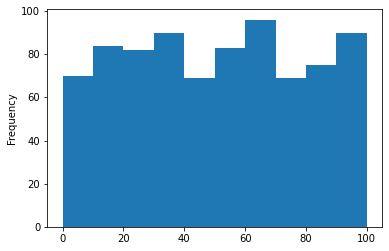

In [48]:
df_customers["age"].plot(kind="hist")

### Cirkeldiagram

Plotta antalet giltiga mailadresser.

Räkna ut totala antalet kunder.

In [50]:
total_customers = df_customers.shape[0]
total_customers2 = df_customers["email"].count()

print(total_customers, total_customers2)

1000 1000


### Valid / invalid email

Beräkna antalet ogiltiga och giltiga mailadresser

In [55]:
invalid_emails = df_customers["email"].str.contains("invalid_email").sum()
valid_emails = total_customers - invalid_emails

print(invalid_emails, valid_emails)

171 829


### Skapa DataFrame

Använd pd.DataFrame för att skapa en ny dataframe för att sedan kunna göra en pie plot.

In [64]:
pie_df = pd.DataFrame({"email": [valid_emails, invalid_emails]}, index=["valid", "invalid"])

pie_df

,email
valid,829
invalid,171


### Plotta vår paj!

<AxesSubplot:ylabel='email'>

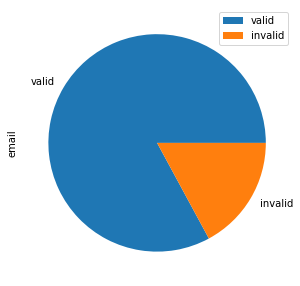

In [66]:
pie_df.plot.pie(y="email", figsize=(5, 5))

# Uppgift till er:

1. Skapa grupp och skriv till Linus på Slack
2. Se över alla vidoer på itslearning
3. Rensa och plotta data för produkter
4. Skapa plots i vs code genom att följa presentationsmaterialet